# Analyzing Suicide Rates from Socioeconomic Status

# Overview
Our goal was to analyze the correlation between the economic status of specific countries throughout multiple years compared to their national suicide rates. We chose countries from different levels of economic development to analyze and identify trends in relation to the suicide rate and economic position. To measure and categorize socioeconomic status, we used GDP (Gross Domestic Product) and HDI (Human Development Index) to determine whether certain countries have a higher position than others.


# Names
Jennifer Sandoval<br>
Maxwell Takeda<br>
Wye Mun Chin<br>
Mahib Hosain<br>
Jinghan Zhang


# Group Member IDs
A10869288<br>
A13868249<br>
A14002736<br>
A92025178<br>
A14905362


# Research Question
Does the economic status of a country influence its suicide rate? Specifically, analyzing the rate of suicide compared to the GDP per year for different countries. 
HDI vs. Suicide for 8 countries 
Human Development Index (HDI) is a statistic used to compare and rank countries by their level of human development. Factors such as income, health, and education is measured in HDI. We attempt to observe if the HDI of a country is indicative of the number of suicides in a country.
GDP vs. Suicide Rate
Gross Domestic Product (GDP) is a statistic that measures the total value of a country's goods and services. Frequently, GDP is also used as an indicator of how well a country's economy is doing and whether it is growing. Similarly to HDI, we are trying to see if the rise (or decline) in GDP correlates to the number of suicides a country has over time.  



# Background and prior work
For this project, our group was interested in analyzing the level of correlation between the standard of living and suicide rates. Before deciding upon a hypothesis, we began researching to find relevant datasets to use and documents that could assist in formulating a strong hypothesis. <br><br>

To find relevant documents, we used Google Scholar which provided case studies and scientific articles. The article, “Economic growth and suicide rate changes: A case in China from 1982 to 2005”, by J. Zhang, et al. analyzed and described the relationship between economic growth and the suicide rate in China from 1982 to 2005. For this study, one of the important factors that J. Zhang et al. analyzed for measuring economic growth was GDP in China. GDP is also a data measurement that we are using in our data analysis, so this article was especially relevant for our background research, and a strong predictor for our hypothesis. In this study, the results illustrated that economic growth correlated to a decrease in the suicide rate.<br><br>

Our group then searched for sources that measured the impact of a decline in economic growth in relation to suicide rates. This information, along with the results from the case study in China, could help solidify our prediction and allow us to create a well-informed hypothesis. The article, “Impact of 2008 global economic crisis on suicide: time trend study in 54 countries” by Shu-Sen Chang et al. analyzed the economic crisis from 2008 in relation to the suicide rate in  54 different countries. The results were not as useful as the case study in China, because the suicide rate was more affected by an increase in unemployment rather than the average economic status of the country. Nonetheless, this result helped us formulate a strong hypothesis about the relationship between a country’s economic status and the national suicide rate.<br><br>

1) https://www.sciencedirect.com/science/article/pii/S0924933809001370<br>
2) https://www.bmj.com/content/347/bmj.f5239.short



# Hypothesis
We hypothesize that there will be a strong negative correlation between socioeconomic status and suicide rate. Since a higher standard of living will correlate to a lower suicide rate, and a more content and satisfied population. We also believe that if GDP and HDI are higher, then a country could better provide resources and access to social programs which can improve the quality of life and hence suicide rates will be lower since people will have less stressers.


# Dataset(s)
Dataset Name: Suicide Rates Overview 1985 to 2016 <br>
Link to the dataset: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016#master.csv<br>
Number of observations: 27.8k<br><br>
This dataset includes social and economic information from different country and compares it to the suicide rate by age groups, and generations. The observations are by year, from 1985 to 2016. 


# Setup

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Part 1: HDI vs. Suicide Rate

# Data Cleaning

In [2]:
data = pd.read_csv("suicide_statistics.csv")
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Here, we select our candidate countries for HDI vs. suicide rate analysis by looking at which of these countries have HDI data. 

In [3]:
new_df = data.dropna(subset=['HDI for year'], inplace=True)

We attempt to find a correlation between the HDI of various countries and its suicide rate (over time). 
First, drop unnecessary columns and rows that are not of interest.

In [4]:
df = pd.DataFrame(data)
df = df.drop(['sex', 'age', 'generation'], axis = 1)
df = df.drop(df.columns[7], axis = 1)
df = df.drop(df.columns[7], axis = 1)
df.set_index("country", inplace = True)
df = df.loc[['Sweden', 'United States', 'Japan', 'Thailand', 'Mexico', 'Brazil', 'Albania', 'Luxembourg']]
df = df.dropna(axis = 0, subset = ['HDI for year'])


To give us a more general reading of suicide rate in a country for a certain year, we coalesce male and female suicide rates of different age groups per each year and normalize this value per 100k people. 

In [5]:
df_suiciderate = df.drop(['HDI for year'], axis = 1)
df_suiciderate = df.groupby(['country-year']).sum()
df_suiciderate['suicide/100k'] = df_suiciderate['suicides_no'] / df_suiciderate['population'] * 100000
df_suiciderate = df_suiciderate.drop(['suicides_no', 'population', 'suicides/100k pop', 'HDI for year', 'year'], axis = 1)
df_suiciderate = df_suiciderate.reset_index()
df_suiciderate.head()

,country-year,suicide/100k
0,Albania1995,3.030929
1,Albania2000,1.931123
2,Albania2005,0.000000
3,Albania2010,3.508740
4,Brazil1985,3.598944


Now, we may re-add the HDI column to our Dataframe containing coalesced suicide rate info.

In [6]:
df_hdi = df[['country-year','HDI for year']]
df_hdi = df_hdi.dropna(axis=0, subset = ['HDI for year'])
df_hdi = df_hdi.drop_duplicates()
df_hdi = df_hdi.reset_index()


In [7]:
df_final = pd.merge(df_hdi, df_suiciderate, on = 'country-year')

df_final.head()

,country,country-year,HDI for year,suicide/100k
0,Sweden,Sweden1990,0.815,18.374408
1,Sweden,Sweden1995,0.856,16.373133
2,Sweden,Sweden2000,0.897,13.449862
3,Sweden,Sweden2005,0.892,14.276305
4,Sweden,Sweden2010,0.901,12.931926


In order to more easily visualize our data, we extract the year from each country-year entry to plot on our time (x) axes.

In [8]:
df_final['year'] = df_final['country-year'].str.extract('(\d+)').astype(int)
df_final = df_final.drop(['country-year'], axis =1)
df_final = df_final.set_index('country')


# Data Visualization and Analysis 

Graph 1: Plot HDI vs. Year for each of our 8 countries. 
We use a scatter matrix to create our points of interest, and then use Numpy's polyfit to create a fit line for the data, so as to visualize a correlation between the HDI of a country and year. 

Text(0, 0.5, 'HDI for year')

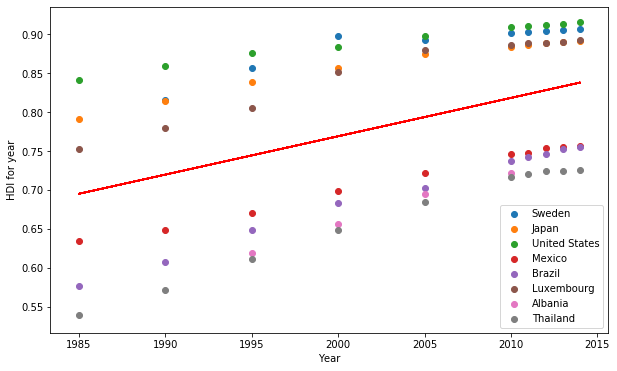

In [9]:
plt.figure(figsize=(10,6))
se = plt.scatter(df_final.loc['Sweden']['year'], df_final.loc['Sweden']['HDI for year'],alpha=1)
jp = plt.scatter(df_final.loc['Japan']['year'],df_final.loc['Japan']['HDI for year'])
us = plt.scatter(df_final.loc['United States']['year'],df_final.loc['United States']['HDI for year'])
mx = plt.scatter(df_final.loc['Mexico']['year'],df_final.loc['Mexico']['HDI for year'])
br = plt.scatter(df_final.loc['Brazil']['year'],df_final.loc['Brazil']['HDI for year'])
lx = plt.scatter(df_final.loc['Luxembourg']['year'], df_final.loc['Luxembourg']['HDI for year'])
ab = plt.scatter(df_final.loc['Albania']['year'], df_final.loc['Albania']['HDI for year'])
tl = plt.scatter(df_final.loc['Thailand']['year'], df_final.loc['Thailand']['HDI for year'])


fit1 = np.polyfit(df_final['year'], df_final['HDI for year'],1)
plt.plot(df_final['year'],fit1[0]*df_final['year']+fit1[1],color='red')

plt.legend((se, jp,us, mx, br, lx, ab, tl),("Sweden","Japan","United States", "Mexico", "Brazil",
                                      "Luxembourg", "Albania", "Thailand"))
plt.xlabel("Year")
plt.ylabel('HDI for year')

Based on the above graph and our polyfit line, we see that the HDI for each country rises as time goes on from 1985 to 2015.

Graph 2: Plot Suicide Rate vs. Year for each of our 8 countries. We follow the same procedure as above in regards to drawing a fit line. 

Text(0, 0.5, 'Suicide Rate/100k')

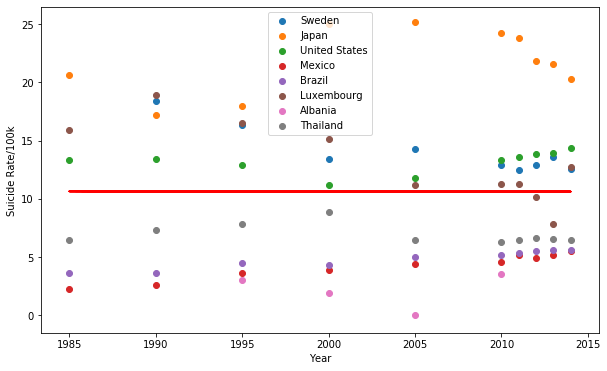

In [10]:
plt.figure(figsize=(10,6))
se = plt.scatter(df_final.loc['Sweden']['year'], df_final.loc['Sweden']['suicide/100k'],alpha=1)
jp = plt.scatter(df_final.loc['Japan']['year'],df_final.loc['Japan']['suicide/100k'])
us = plt.scatter(df_final.loc['United States']['year'],df_final.loc['United States']['suicide/100k'])
mx = plt.scatter(df_final.loc['Mexico']['year'],df_final.loc['Mexico']['suicide/100k'])
br = plt.scatter(df_final.loc['Brazil']['year'],df_final.loc['Brazil']['suicide/100k'])
lx = plt.scatter(df_final.loc['Luxembourg']['year'], df_final.loc['Luxembourg']['suicide/100k'])
ab = plt.scatter(df_final.loc['Albania']['year'], df_final.loc['Albania']['suicide/100k'])
tl = plt.scatter(df_final.loc['Thailand']['year'], df_final.loc['Thailand']['suicide/100k'])

fit1 = np.polyfit(df_final['year'], df_final['suicide/100k'],1)
plt.plot(df_final['year'],fit1[0]*df_final['year']+fit1[1],color='red')

plt.legend((se, jp,us, mx, br, lx, ab, tl),("Sweden","Japan","United States", "Mexico", "Brazil",
                                      "Luxembourg", "Albania", "Thailand"))
plt.xlabel("Year")
plt.ylabel('Suicide Rate/100k')

From looking at the above graph, we can see that as the years progress, the suicide rates for most countries stay consistent. Some countries, like Luxembourg and Japan, have interesting progressions. 

Graph 3: Plot Suicide Rate (y axis) vs. HDI per year (x axis) so as to visualize a correlation between suicide rate and HDI. We can use this graph to see if it may be possible to predict the suicide rate of a country given its HDI. 

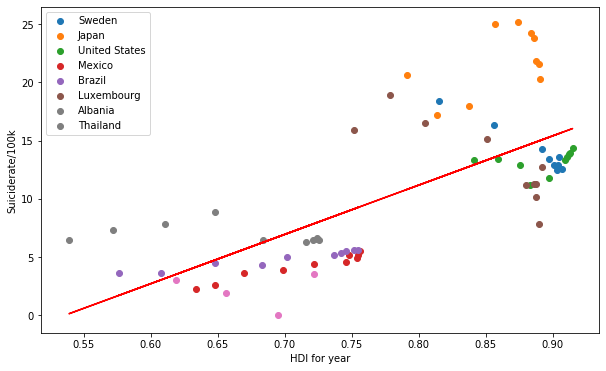

In [11]:
plt.figure(figsize=(10,6))
se = plt.scatter(df_final.loc['Sweden']['HDI for year'], df_final.loc['Sweden']['suicide/100k'],alpha=1)
jp = plt.scatter(df_final.loc['Japan']['HDI for year'],df_final.loc['Japan']['suicide/100k'])
us = plt.scatter(df_final.loc['United States']['HDI for year'],df_final.loc['United States']['suicide/100k'])
mx = plt.scatter(df_final.loc['Mexico']['HDI for year'],df_final.loc['Mexico']['suicide/100k'])
br = plt.scatter(df_final.loc['Brazil']['HDI for year'],df_final.loc['Brazil']['suicide/100k'])
lx = plt.scatter(df_final.loc['Luxembourg']['HDI for year'], df_final.loc['Luxembourg']['suicide/100k'])
ab = plt.scatter(df_final.loc['Albania']['HDI for year'], df_final.loc['Albania']['suicide/100k'])
ab = plt.scatter(df_final.loc['Thailand']['HDI for year'], df_final.loc['Thailand']['suicide/100k'])


fit1 = np.polyfit(df_final['HDI for year'], df_final['suicide/100k'],1)
plt.plot(df_final['HDI for year'],fit1[0]*df_final['HDI for year']+fit1[1],color='red')

plt.legend((se, jp,us, mx, br, lx, ab, tl),("Sweden","Japan","United States", "Mexico", "Brazil",
                                      "Luxembourg", "Albania", "Thailand"))
plt.xlabel('HDI for year');
plt.ylabel('Suiciderate/100k');

Analyze the correlation using Dataframe.corr() between HDI for year and suicide rate. 

In [12]:
corr = df_final.corr()
corr

,HDI for year,suicide/100k,year
HDI for year,1.000000,0.698449,0.452208
suicide/100k,0.698449,1.000000,-0.001438
year,0.452208,-0.001438,1.000000


In [13]:
df_final = df_final.rename(columns = {'HDI for year': 'HDI', 'suicide/100k': 'suiciderate'})
df_final = df_final.reset_index()


Our result for the correlation between suicide rate and HDI is 0.698, which would suggest there is a positive correlation (yet not a strong one) between HDI and suicide rate for a country. We will further investigate this result with linear models. 

We start by conducting a multivariate regression in order to answer the question: 
Can we significantly predict the suicide rate of a country given its HDI?  

In [14]:
outcome_1, predictors_1 = patsy.dmatrices("suiciderate ~ HDI + country", df_final)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:            suiciderate   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     86.92
Date:                Sat, 08 Jun 2019   Prob (F-statistic):           2.13e-31
Time:                        18:44:27   Log-Likelihood:                -147.67
No. Observations:                  73   AIC:                             313.3
Df Residuals:                      64   BIC:                             333.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Using a significance value of 0.05, we can see that we are able to predict the suicide rate of a country if we are given both the country name as well as the HDI. For instance, the P-value we retrieve from the regression in Sweden's row is 0.000, which is less than 0.05. Therefore, we can reject the null hypothesis (meaning we can conclude there is a significant prediction given HDI and country name). 

However, without the country name, and simply only given HDI, we see that the P-value is 0.409 > 0.05. In this situation, we fail to reject the null hypothesis, meaning we cannot conclude that we can predict suicide rate given only the HDI of a country. 

It makes sense that the country name is a strong predictor of suicide rate, as per graph 2. However, we have found that although two countries may have similar HDI status, their suicide rates could be different (for example, Japan and the United States). 


Now, we attempt to predict suicide rates of three specific countries of high, medium, and low respective levels of human development (Luxembourg, United States, and Mexico). 
For each country, we will graph the HDI vs. suicide rate and conduct a linear regression to see if the relative level of human development in a country has anything to do with predicting its suicide rate.
We begin with Luxembourg:


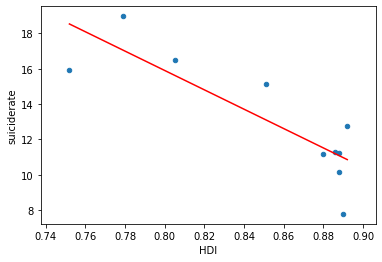

In [15]:
df_Luxem = df_final.loc[df_final['country'] == 'Luxembourg']
df_Luxem.plot.scatter('HDI', 'suiciderate')
fit1 = np.polyfit(df_Luxem['HDI'], df_Luxem['suiciderate'],1)
plt.plot(df_Luxem['HDI'],fit1[0]*df_Luxem['HDI']+fit1[1],color='red')

Here, we can see that as the HDI of Luxembourg increases, its suicide rate drops. 

In [16]:
outcome_Luxem, predictors_Luxem = patsy.dmatrices("suiciderate ~ HDI", df_Luxem)
mod_Luxem = sm.OLS(outcome_Luxem, predictors_Luxem)
res_Luxem = mod_Luxem.fit()
print(res_Luxem.summary())

                            OLS Regression Results                            
Dep. Variable:            suiciderate   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     20.30
Date:                Sat, 08 Jun 2019   Prob (F-statistic):            0.00199
Time:                        18:44:28   Log-Likelihood:                -19.624
No. Observations:                  10   AIC:                             43.25
Df Residuals:                       8   BIC:                             43.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.6950     10.359      5.763      0.0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Using a significance value of P = 0.05, our analysis on Luxembourg suggests that its HDI is a strong predictor of its suicide rate (as HDI's P-value of 0.002 is less than the significance level). 

Next, we analyze the United States in a similar fashion. 

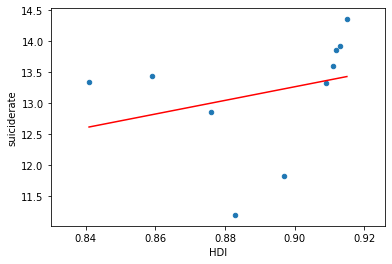

In [17]:
df_us = df_final.loc[df_final['country'] == 'United States']
df_us.plot.scatter('HDI', 'suiciderate')
fit1 = np.polyfit(df_us['HDI'], df_us['suiciderate'],1)
plt.plot(df_us['HDI'],fit1[0]*df_us['HDI']+fit1[1],color='red')

The United States has a weaker correlation between HDI and suicide rate, as evidenced by the scatter plot. We will see if its HDI will still be a strong predictor of its suicide rate as Luxembourg's was. 

In [18]:
outcome_us, predictors_us = patsy.dmatrices("suiciderate ~ HDI", df_us)
mod_us = sm.OLS(outcome_us, predictors_us)
res_us = mod_us.fit()
print(res_us.summary())

                            OLS Regression Results                            
Dep. Variable:            suiciderate   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.7454
Date:                Sat, 08 Jun 2019   Prob (F-statistic):              0.413
Time:                        18:44:28   Log-Likelihood:                -13.020
No. Observations:                  10   AIC:                             30.04
Df Residuals:                       8   BIC:                             30.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3464     11.387      0.294      0.7

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Using the same significance level as before, our analysis on the United States suggests that its HDI is a weak predictor of its suicide rate (since our P-value for HDI of 0.413 is much greater than 0.05, our significance level). 

Finally, we will run the same analysis on Mexico. 

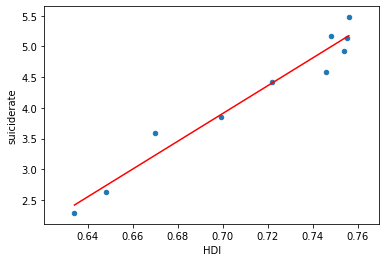

In [19]:
df_Mexico = df_final.loc[df_final['country'] == 'Mexico']
df_Mexico.plot.scatter('HDI', 'suiciderate')
fit1 = np.polyfit(df_Mexico['HDI'], df_Mexico['suiciderate'],1)
plt.plot(df_Mexico['HDI'],fit1[0]*df_Mexico['HDI']+fit1[1],color='red')

As evidenced from the above scatter plot, there seems to be a strong correlation between Mexico's HDI and suicide rate over the years. 

In [20]:
outcome_Mexico, predictors_Mexico = patsy.dmatrices("suiciderate ~ HDI", df_Mexico)
mod_Mexico = sm.OLS(outcome_Mexico, predictors_Mexico)
res_Mexico = mod_Mexico.fit()
print(res_Mexico.summary())

                            OLS Regression Results                            
Dep. Variable:            suiciderate   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     178.9
Date:                Sat, 08 Jun 2019   Prob (F-statistic):           9.33e-07
Time:                        18:44:29   Log-Likelihood:                 1.1954
No. Observations:                  10   AIC:                             1.609
Df Residuals:                       8   BIC:                             2.214
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.9047      1.207     -9.863      0.0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


The analysis we conduct on Mexico suggests there is a strong correlation between HDI and suicide rate, as our P-value of 0.000 is much smaller than our significance level of 0.05. 

We can see from the analysis of these three countries in particular with different levels of development that, as long as HDI and suicide rate have a strong correlation, we are able to predict the country's suicide rate. The United States could be an outlier of some sorts, seeing as its suicide rate does not always correspond with its HDI. 

# Part 2: GDP vs. Suicide Rate 

# Data Cleaning

In [21]:
#making a dataframe out of the csv data
data2 = pd.read_csv("suicide_statistics.csv")
df2 = pd.DataFrame(data2)
df2.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [22]:
#drop all irrelevant columns
df2_drop = df2.drop(['HDI for year', 'generation'],axis=1)

#rename columns and drop rows that don't have our var of interest i.e. gdp per year
df2_drop.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k','country-year','gdp_year','gdp_capita']
df2_drop = df2_drop.dropna(axis=0, subset=['gdp_year'])

df2_drop.head()

,country,year,sex,age,suicides_no,population,suicides/100k,country-year,gdp_year,gdp_capita
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796


In [ ]:
#find gdp for each country in each year
df2_gdp = df2_drop[['country-year','gdp_year']]
df2_gdp = df2_gdp.drop_duplicates()
df2_gdp = df2_gdp.reset_index()

#function that checks the gdp for a certain country in a certain year
def get_GDP(str_in) :
    filter = df2_gdp["country-year"] == str_in
    res = df2_gdp.where(filter).dropna()
    if (res.empty):
        return -1
    else:
        return int(res['gdp_year'].str.replace(',',''))

#find suicide rate for each country by totalling # suicides, dividing over total population then over 100k for better visualization
df2_suiciderate = df2_drop.groupby(['country','year']).sum()
df2_suiciderate['suicide/100k'] = df2_suiciderate['suicides_no'] / df2_suiciderate['population'] * 100000
df2_suicide_reset = df2_suiciderate.reset_index()

#adding the country-year, to help find gdp for that country and year and adding both of these to the df
country_year = []
gdp_year = []

for row in df2_suicide_reset.itertuples():
    cy = row[1] + str(row[2])
    country_year.append(cy)
    gdp = get_GDP(cy)
    gdp_year.append(gdp)
    
df2_suicide_reset['country-year'] = country_year
df2_suicide_reset['gdp_year'] = gdp_year

#dropping unnecessary cols
df2_suicide_reset = df2_suicide_reset.drop(['gdp_capita','suicides/100k'],axis=1)
df2_suicide_reset.head()

In [ ]:
#ANALYSIS START - data visualization for second q
df2_fin = df2_suicide_reset
df2_fin['gdp_year'].describe()
df2_fin['gdp_year'].plot.hist(bins=25)
plt.title('Distribution of GDP per year for all countries between 1985 and 2015')
f1 = plt.gcf()

The above graph highlights the number of times that countries had a certain GDP between 1985 and 2015. From this graph we can conclude that a mast majority of countries had a GDP less than .25 billion. There are a couple outliers that can be identified with a GDP close to 1.5 billion. This graph is useful to visualize the overall GDP frequencies for all countries in the dataset.

In [ ]:
df2_fin['suicide/100k'].describe()
df2_fin['suicide/100k'].plot.hist(bins=25)
plt.title('Distribution of Suicides per 100k for all countries between 1985 and 2015')
f2 = plt.gcf()

The above graph highlights the frequency of suicides per year for all the countries in the dataset. The suicide rate for most years per country is less than 20 per 100k, with the highest suicide rate reaching ~50 per 100k, and the lowest being ~0 per 100k. However, this distribution has a strong right-skew, which means that the mean wil be higher than the median. The highest suicide rate frequency is present ~8 per 100k.   

In [ ]:
#no neg values, possible to have 0 suicides, min value for gdp is reasonable, no more cleaning. 
#continue analyses
desc = df2_fin.describe()
desc

In [ ]:
#finding low-tier countries based on gdp
df2_test = df2_suicide_reset.groupby(['country','year']).sum()
df2_test = df2_test.reset_index()
df2_test = df2_test.set_index('country')
pd.set_option('display.max_rows',2000)
df2_test.sort_values(by=['gdp_year'])

df2_lowest = df2_test.loc[['Kiribati','Grenada','Saint Vincent and Grenadines']]
df2_lowest.head()

# Data Visualization and Analysis

In [ ]:


plt.figure(figsize=(10,6))
kb = plt.scatter(df2_test.loc['Kiribati']['year'],df2_test.loc['Kiribati']['gdp_year'],alpha=1)
gr = plt.scatter(df2_test.loc['Grenada']['year'],df2_test.loc['Grenada']['gdp_year'])
svg = plt.scatter(df2_test.loc['Saint Vincent and Grenadines']['year'],df2_test.loc['Saint Vincent and Grenadines']['gdp_year'])
fit = np.polyfit(df2_lowest['year'], df2_lowest['gdp_year'],1)
plt.plot(df2_lowest['year'],fit[0]*df2_lowest['year']+fit[1],color='red')
plt.legend((kb,gr,svg),("Kiribati","Grenada","Saint Vincent and Grenadines"))
plt.title('GDP for low-tier countries between 1985 to 2015')

plt.xlabel('Year');
plt.ylabel('GDP ($)');

plt.figure(figsize=(10,6))
plt.scatter(df2_test.loc['Kiribati']['year'],df2_test.loc['Kiribati']['suicide/100k'],alpha=1)
plt.scatter(df2_test.loc['Grenada']['year'],df2_test.loc['Grenada']['suicide/100k'])
plt.scatter(df2_test.loc['Saint Vincent and Grenadines']['year'],df2_test.loc['Saint Vincent and Grenadines']['suicide/100k'])
fit1 = np.polyfit(df2_lowest['year'], df2_lowest['suicide/100k'],1)
plt.plot(df2_lowest['year'],fit1[0]*df2_lowest['year']+fit1[1],color='red')
plt.title('Number of suicides per 100k for low-tier countries between 1985 to 2015')
plt.legend((kb,gr,svg),("Kiribati","Grenada","Saint Vincent and Grenadines"))
plt.xlabel('Year');
plt.ylabel('Number of suicides per 100k');
#plt.xticks(np.arange(1e10,1.5e13,step=1e11))

#lowest 3 : Kiribati, Saint Vincent and Grenadines, Grenada
#highest 3: US, Japan, Germany
#middle 3: Slovakia, Slovenia, Serbia

The above graphs show a negative correlation between GDP and number of suicides per 100k in countries with a low GDP by comparing the slopes of the best-fit lines found in the two graphs. In the first graph, it is evident that the GDP for countries with a lower GDP increases over time. While the second graph illustrates that the suicide rate for these countries decreases over the same time period found in the first graph. 

In [ ]:
df2_mid = df2_test.loc[['Slovenia','Slovakia','Serbia']]
plt.figure(figsize=(10,6))
sv = plt.scatter(df2_test.loc['Slovakia']['year'],df2_test.loc['Slovakia']['gdp_year'],alpha=1)
sl = plt.scatter(df2_test.loc['Slovenia']['year'],df2_test.loc['Slovenia']['gdp_year'])
sb = plt.scatter(df2_test.loc['Serbia']['year'],df2_test.loc['Serbia']['gdp_year'])
fit = np.polyfit(df2_mid['year'], df2_mid['gdp_year'],1)
plt.plot(df2_mid['year'],fit[0]*df2_mid['year']+fit[1],color='red')
plt.legend((sv,sl,sb),("Slovakia","Slovenia","Serbia"))
plt.title('GDP for mid-tier countries between 1985 to 2015')
plt.xlabel('Year');
plt.ylabel('GDP ($)');

plt.figure(figsize=(10,6))
sv = plt.scatter(df2_test.loc['Slovakia']['year'],df2_test.loc['Slovakia']['suicide/100k'],alpha=1)
sl = plt.scatter(df2_test.loc['Slovenia']['year'],df2_test.loc['Slovenia']['suicide/100k'])
sb = plt.scatter(df2_test.loc['Serbia']['year'],df2_test.loc['Serbia']['suicide/100k'])
fit = np.polyfit(df2_mid['year'], df2_mid['suicide/100k'],1)
plt.plot(df2_mid['year'],fit[0]*df2_mid['year']+fit[1],color='red')
plt.title('Number of suicides per 100k for mid-tier countries between 1985 to 2015')
plt.legend((sv,sl,sb),("Slovakia","Slovenia","Serbia"))
plt.xlabel('Year');
plt.ylabel('Number of suicides per 100k');

The above graphs show a weak negative correlation between GDP over time and number of suicides per 100k over time for countries with a average GDP comapared to the rest of the countries found in the dataset. The first graph, illustrates that the chosen countries had an steady increase in GDP from 1985 to 2015. While the second graph highlights the fact that during the same time period, there was a slight decrease of suicides per year. By comparing the bestfit lines found in both graphs, there is evidence that there is a weak negative correlation between GDP and suicide rate. 

In [ ]:
df2_high = df2_test.loc[['United States','Japan','Germany']]

plt.figure(figsize=(10,6))
us = plt.scatter(df2_test.loc['United States']['year'],df2_test.loc['United States']['gdp_year'],alpha=1)
jp = plt.scatter(df2_test.loc['Japan']['year'],df2_test.loc['Japan']['gdp_year'])
gm = plt.scatter(df2_test.loc['Germany']['year'],df2_test.loc['Germany']['gdp_year'])
fit = np.polyfit(df2_high['year'], df2_high['gdp_year'],1)
plt.plot(df2_high['year'],fit[0]*df2_high['year']+fit[1],color='red')
plt.legend((us,jp,gm),("United States","Japan","Germany"))
plt.title('GDP for high-tier countries between 1985 to 2015')
plt.xlabel('Year');
plt.ylabel('GDP ($)');

plt.figure(figsize=(10,6))
sv = plt.scatter(df2_test.loc['United States']['year'],df2_test.loc['United States']['suicide/100k'],alpha=1)
sl = plt.scatter(df2_test.loc['Japan']['year'],df2_test.loc['Japan']['suicide/100k'])
sb = plt.scatter(df2_test.loc['Germany']['year'],df2_test.loc['Germany']['suicide/100k'])
fit = np.polyfit(df2_high['year'], df2_high['suicide/100k'],1)
plt.plot(df2_high['year'],fit[0]*df2_high['year']+fit[1],color='red')
plt.title('Number of suicides per 100k for high-tier countries between 1985 to 2015')
plt.legend((us,jp,gm),("United States","Japan","Germany"))
plt.xlabel('Year');
plt.ylabel('Number of suicides per 100k');

The above graphs measure GDP over time and and number of suicides per 100k over the same time period for countries with a large GDP value. In the first graph, it is evident that all three countries had a steady increase in GDP over time. While the second graph for suicides over time does not show a steady pattern throughout the years. Therefore, the bestfit line for the second graph is very horizontal and we cannot conlude that a higher GDP correlates to a lower suicide rate.

In [ ]:
plt.figure(figsize=(10,6))
sv = plt.scatter(df2_test.loc['United States']['year'],df2_test.loc['United States']['suicide/100k'],alpha=1)
fit = np.polyfit(df2_high.loc['United States']['year'], df2_high.loc['United States']['suicide/100k'],1)
plt.plot(df2_high.loc['United States']['year'],fit[0]*df2_high.loc['United States']['year']+fit[1],color='red')
plt.title('Number of suicides per 100k for United States between 1985 to 2015')
plt.xlabel('Year');
plt.ylabel('Number of suicides per 100k');


plt.figure(figsize=(10,6))
sv = plt.scatter(df2_test.loc['Japan']['year'],df2_test.loc['Japan']['suicide/100k'],alpha=1,color='orange')
fit = np.polyfit(df2_high.loc['Japan']['year'], df2_high.loc['Japan']['suicide/100k'],1)
plt.plot(df2_high.loc['Japan']['year'],fit[0]*df2_high.loc['Japan']['year']+fit[1],color='red')
plt.title('Number of suicides per 100k for Japan between 1985 to 2015')
plt.xlabel('Year');
plt.ylabel('Number of suicides per 100k');

plt.figure(figsize=(10,6))
sv = plt.scatter(df2_test.loc['Germany']['year'],df2_test.loc['Germany']['suicide/100k'],alpha=1,color='green')
fit = np.polyfit(df2_high.loc['Germany']['year'], df2_high.loc['Germany']['suicide/100k'],1)
plt.plot(df2_high.loc['Germany']['year'],fit[0]*df2_high.loc['Germany']['year']+fit[1],color='red')
plt.title('Number of suicides per 100k for Germany between 1990 to 2015')
plt.xlabel('Year');
plt.ylabel('Number of suicides per 100k');

For the three graphs above, we decided to split up the countries found in the number of suicides per 100k for high-tier countries. This is due to the fact, that the values presented in the graph varied a lot for each country. The first graph, compares the suicide rate over time for the United States. This bestfit line had a slight positive slope, which corresponds to a positive correlation to the rise of GDP. The second graph compares the suicide rate for Japan, which also had a positive slope for the bestfit line. Lastly, the third graph illustrates the number of suicides over time for Germany. This had a bestfit line with a negative slope, which corresponds to a strong negative correlation to the rise of their GDP. 

In [ ]:
#calculate pairwise correlation between all vars
corrs = df2_fin.corr()
corrs
#the two highest correlates for suicide_rate are suicides_no and log(gdp)
#population and suicides_no, as well as population and gdp_year are highly correlated

In [ ]:
plt.scatter(df2_fin['gdp_year'],df2_fin['suicide/100k'],s=20)
plt.xlabel('gdp')
plt.ylabel('suicide/100k')

The above graph highlights the GDP per year versus the suicide rate per 100k for that given year. The graph shows that countries with a GDP on the lower end of the x-axis with a GDP less than 200 billion has a wide range of suicides per 100k. While the suicide rate flat-lines once the GDP reached above ~7 trillion. 

In [ ]:
#predictions
df2_fin.columns = ['country','year','suicides_no','population','suicideper100','country-year','gdp_year']
a1, b1 = np.polyfit(df2_fin['gdp_year'],df2_fin['suicideper100'],1)

gdp = np.arange(1e8,2e13,1e10)
pred_gdp = np.array([],dtype=float)

for i in gdp:
    pred = a1 * i + b1
    pred_gdp = np.append(pred_gdp,pred)

plt.scatter(df2_fin['gdp_year'],df2_fin['suicideper100'],s=20)
plt.plot(gdp, pred_gdp, color='red')
plt.xlabel('gdp')
plt.ylabel('suicide/100k')


f5 = plt.gcf()

The above graph is the same graph that plots gdp versus suicide per 100k, however this graph includes a bestfit line which plots a positive correlation. 

In [ ]:
#linear model to assess significance of gdp as a predictor of suicide
outcome_1, predictors_1 = patsy.dmatrices('suicideper100 ~ gdp_year', df2_fin)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [ ]:
# Print out the summary results of the model fitting
print(res_1.summary())

In [ ]:
#using alpha=0.01, we reject the null hypothesis so gdp per year significantly predicts suicide per 100k.

# Ethics and Privacy
For the dataset chosen to be analyzed, there are not many privacy concerns, since the observations are based upon large populations rather than individuals. However, there are concerns about biases and potential prejudices since some of the countries included in the dataset have more complete data, and most of the countries are in the top-tier of the socioeconomic status spectrum. In addition, by providing a suicide rate value for a certain population based upon gender and age, people could develop a prejudice about that age group or gender that is not actually true.<br><br> 

In order to avoid this issue, we chose to analyze populations for entire countries, which include a larger age range and more than one gender. By doing so, we eliminate the possibility of people developing prejudices for certain age groups or genders.


# Conclusion & Discussion
GDP and HDI are data values that can indicate the socioeconomic status of a country. The purpose for using both was to see if one was a better predictor of suicide rates over the other and if either were valid to use in to prove or disprove our hypothesis.

HDI vs. Suicide rate:<br>
Our analysis of eight different countries' HDI and suicide rates over time gave us understanding of when HDI can be a good predictor of a country's suicide rate. In the case that we involve the country's name as part of the prediction, our prediction is generally very strong. However, without the country name (only using HDI), our results vary. By isolating three specific countries in our analysis, we came to the conclusion that we can make a strong prediction of suicide rate only when there is a strong correlation between HDI and suicide rate. For example, Mexico and Luxembourg have strong correlations between these two variables and so the predictions were very accurate (whereas for the United States and Japan, our predictions were much weaker). Our data suggested that the increase in HDI marked an increase in suicide rate as well, which contradicts our hypothesis. However, since our ability to predict suicide rate depends on the correlation of suicide rate and HDI, it is not safe to conclude that a higher HDI results in a lower suicide rate. 
<br>

GDP vs. Suicide Rate:<br>

Separating the countries into the three highest, lowest and mid GDPs gave us a range of information. For the countries with the lowest GDP, we saw that as their GDP rose from 1985 - 2015 there was a slight decline in suicides which is what we hypothesized. We concluded the same results from the chosen mid-tier countries. Our hypothesis differed when analyzing the top three countries with the highest GDP. As analyzed in the graphs, we speculate that culture and other confounding variables can be associated with the difference in trends found in the graphs for the U.S., Japan, and Germany.  For example, although the U.S. has the highest GDP, there is an inclination of suicide rates going up which contradicts our hypothesis. We found that the overall trend is that as the country GDP goes up suicide rates will go down.<br>

Limitations of Analysis:<br>

One limitation of our data was that we do not have information for every country in the world. Also, some of the countries in our dataset did not have HDI information and others did not have information for all years spanning 1985 - 2015. For the most part, the countries in our dataset are for more developed countries and there is no information regarding third world countries.

<br>



Overall, we find that GDP of a country is a more consistent predictor of a country's suicide rate than HDI is, for HDI requires additional information such as the country name to be extremely strong. We also find that our hypothesis is not always correct